In [1]:
import ipywidgets as widgets
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.widgets import Cursor
from IPython.display import display, clear_output

%matplotlib ipympl

In [2]:
basemap_check = widgets.Checkbox(False, description="basemap", indent=False)
geology_check = widgets.Checkbox(False, description="geology", indent=False)
faults_check = widgets.Checkbox(False, description="faults", indent=False)
infrastructure_check = widgets.Checkbox(False, description="infrastructure", indent=False)

def on_check(change):
    print("gonna change plot")

basemap_check.observe(on_check, names="value")
geology_check.observe(on_check, names="value")
faults_check.observe(on_check, names="value")
infrastructure_check.observe(on_check, names="value")

checks_layout = widgets.VBox([basemap_check, geology_check, faults_check, infrastructure_check])

In [65]:
output_fig = widgets.Output()


def update_point_plot(change):
    with output_fig:
        clear_output(wait=True)
        # Create some initial data points

        x = np.arange(0, 10000, dx_slider.value)
        y = np.arange(0, 10000, dy_slider.value)

        plot_x, plot_y = np.meshgrid(x, y)
        
        plot_x = plot_x.flatten()
        plot_y = plot_y.flatten()

        fig = plt.figure()
        fig.clf()
        ax = fig.add_subplot(1, 1, 1)
        sc = ax.scatter(plot_x, plot_y)

        # Variables to store the selected point and its index
        selected_point = None
        selected_index = None
        
        # Define a function to update the plot
        def on_click(event):
            # clear_output(wait=True)
            global selected_point, selected_index
            if event.inaxes == ax:
                for index in range(len(plot_x)):
                    if (
                        np.sqrt(
                            (plot_x[index] - event.xdata) ** 2
                            + (plot_y[index] - event.ydata) ** 2
                        )
                        < (dx_slider.value**2 + dy_slider.value**2) ** (1 / 2)
                        / 2
                    ):
                        selected_point = (plot_x[index], plot_y[index])
                        selected_index = index
                        break
                        # plot_x[index] = event.xdata
                        # plot_y[index] = event.ydata
                        # sc.set_offsets(np.c_[plot_x, plot_y])
                        # plt.draw()
                        # break

        

        # Function to handle mouse click events
        # def on_click(event):
        #     global selected_point, selected_index
        #     if event.inaxes == ax:
        #         # Check if the click is near any point
        #         for i in range(len(x)):
        #             if np.sqrt((plot_x[i] - event.xdata) ** 2 + (y[i] - event.ydata) ** 2) < 0.1:
        #                 selected_point = (x[i], y[i])
        #                 selected_index = i
        #                 break

        # Function to handle mouse motion events
        def on_motion(event):
            global selected_point, selected_index
            if selected_point is not None and event.inaxes == ax:
                # Update the position of the selected point
                plot_x[selected_index] = event.xdata
                plot_y[selected_index] = event.ydata
                sc.set_offsets(np.c_[plot_x, plot_y])
                plt.draw()

        # Function to handle mouse release events
        def on_release(event):
            global selected_point, selected_index
            selected_point = None
            selected_index = None

        # Connect the event handlers to the figure
        fig.canvas.mpl_connect('button_press_event', on_click)
        fig.canvas.mpl_connect('motion_notify_event', on_motion)
        fig.canvas.mpl_connect('button_release_event', on_release)

        # Connect the event to the update_plot function
        #fig.canvas.mpl_connect("button_press_event", move_point)

        cursor = Cursor(ax, useblit=True, color='red', linewidth=1)
        ax.grid(True)
        ax.set_axisbelow(True)
        plt.title("Click on a point to move it")
        plt.xlabel("Easting (m)")
        plt.ylabel("Northing (m)")

        plt.show()

In [66]:
# sliders for point distance

dx_slider = widgets.FloatSlider(value=500, min=100, max=5000, step=100, description="East Spacing") 
dy_slider = widgets.FloatSlider(value=500, min=100, max=5000, step=100, description="North Spacing") 

dx_slider.observe(update_point_plot, "value")
dy_slider.observe(update_point_plot, "value")

points_layout = widgets.VBox([dx_slider, dy_slider])


In [67]:
left_layout = widgets.VBox([checks_layout, points_layout])
layout = widgets.HBox([left_layout, output_fig])
display(layout)
update_point_plot(None)



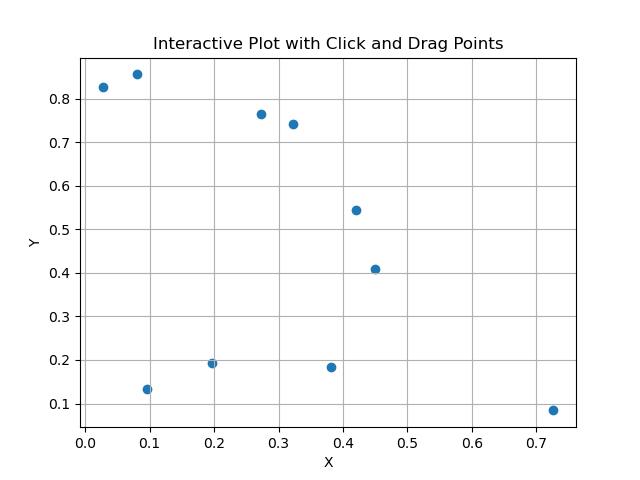

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Create initial data
x = np.random.rand(10)
y = np.random.rand(10)

# Create the plot
fig, ax = plt.subplots()
sc = ax.scatter(x, y)

# Variables to store the selected point and its index
selected_point = None
selected_index = None

# Function to handle mouse click events
def on_click(event):
    global selected_point, selected_index
    if event.inaxes == ax:
        # Check if the click is near any point
        for i in range(len(x)):
            if np.sqrt((x[i] - event.xdata) ** 2 + (y[i] - event.ydata) ** 2) < 0.1:
                selected_point = (x[i], y[i])
                selected_index = i
                break

# Function to handle mouse motion events
def on_motion(event):
    if selected_point is not None and event.inaxes == ax:
        # Update the position of the selected point
        x[selected_index] = event.xdata
        y[selected_index] = event.ydata
        sc.set_offsets(np.c_[x, y])
        plt.draw()

# Function to handle mouse release events
def on_release(event):
    global selected_point, selected_index
    selected_point = None
    selected_index = None

# Connect the event handlers to the figure
fig.canvas.mpl_connect('button_press_event', on_click)
fig.canvas.mpl_connect('motion_notify_event', on_motion)
fig.canvas.mpl_connect('button_release_event', on_release)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interactive Plot with Click and Drag Points')
plt.grid(True)
plt.show()
